In [1]:
!pip install graphrole


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 6.7 MB/s 
     |████████████████████████████████| 9.5 MB 30.1 MB/s 
     |████████████████████████████████| 14.8 MB 10.3 MB/s 
     |████████████████████████████████| 22.3 MB 13.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
  

In [2]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import networkx as nx

In [3]:
G = nx.read_edgelist("as.txt", delimiter="	")

#Features are then extracted from a graph G into a pandas.DataFrame:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

#these features are used to learn roles. The number of roles is automatically 
#determined by a model selection procedure when n_roles=None is passed to the
#RoleExtractor class instance. Alternatively, n_roles can be set to a desired 
#number of roles to be extracted.
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

#The role assignment for each node can be retrieved as a dictionary
#print("ROLE ASSIGMENT")
#print(role_extractor.roles)
#print("\n\n")

#Alternatively, roles can be viewed as a soft assignment and a node's percent
#membership to each role can be retrieved as a pandas.DataFrame
print("PROBABILITYS FOR EACH NODE")
print(role_extractor.role_percentage)
print("\n\n")


PROBABILITYS FOR EACH NODE
        role_0    role_1    role_2    role_3    role_4    role_5
0     0.191853  0.426794  0.079853  0.079853  0.029794  0.191853
1     0.889662  0.005515  0.079009  0.014783  0.005515  0.005515
10    0.060023  0.252280  0.003846  0.676160  0.003846  0.003846
100   0.136403  0.136403  0.008739  0.573313  0.136403  0.008739
1000  0.048525  0.048525  0.757376  0.048525  0.048525  0.048525
...        ...       ...       ...       ...       ...       ...
995   0.028396  0.443208  0.443208  0.028396  0.028396  0.028396
996   0.048525  0.048525  0.048525  0.048525  0.757376  0.048525
997   0.048525  0.048525  0.048525  0.048525  0.757376  0.048525
998   0.028396  0.028396  0.443208  0.028396  0.443208  0.028396
999   0.166667  0.166667  0.166667  0.166667  0.166667  0.166667

[6474 rows x 6 columns]





In [4]:
nodes = {'role_0': 0, 'role_1': 0, 'role_2': 0, 'role_3': 0, 'role_4': 0, 'role_5': 0}
for v in role_extractor.roles.values():
    nodes[v] += 1
print(nodes)

{'role_0': 2693, 'role_1': 75, 'role_2': 1216, 'role_3': 240, 'role_4': 2247, 'role_5': 3}


In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def printGraph(G, pos, roles):
    figure(figsize=(12, 12), dpi=90)

    # positions for all nodes
    # nodes
    for n in G.nodes():
        if roles[n] == "role_0":
            color = "red"
        elif roles[n] == "role_1":
            color = "blue"
        elif roles[n] == "role_2":
            color = "green"
        elif roles[n] == "role_3":
            color = "pink"
        elif roles[n] == "role_4":
            color = "orange"
        elif roles[n] == "role_5":
            color = "yellow"
        nx.draw_networkx_nodes(G, pos, nodelist=[n], node_size=36, node_color=color)
    # edges
    nx.draw_networkx_edges(G, pos, width=0.5,alpha=0.2)
    # labels
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.show()



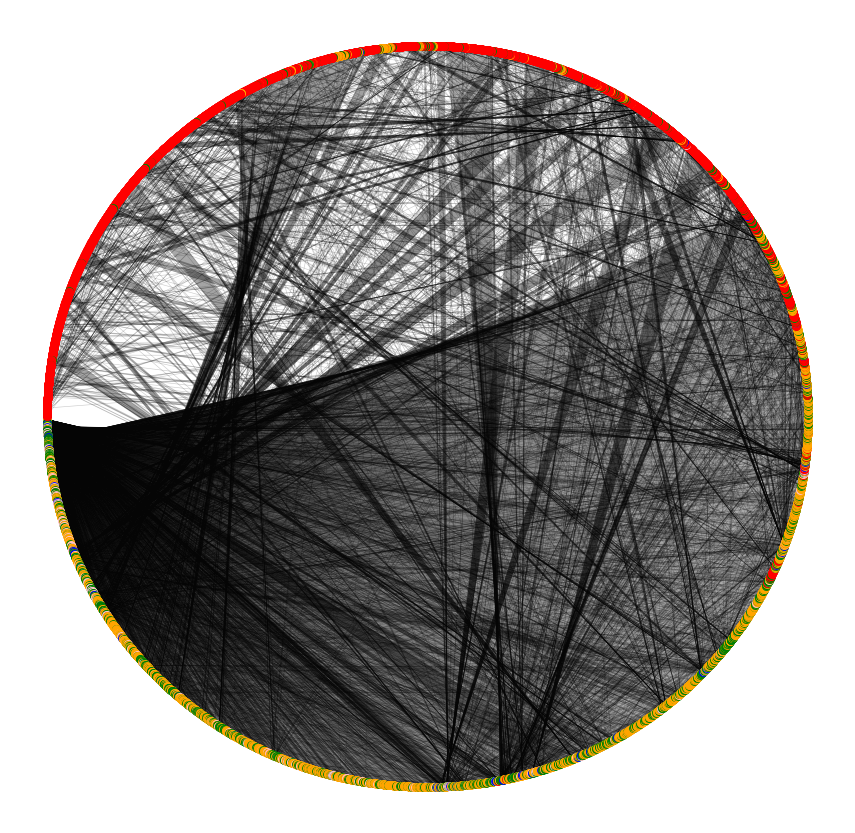

In [6]:
pos = nx.shell_layout(G)
printGraph(G, pos, role_extractor.roles)


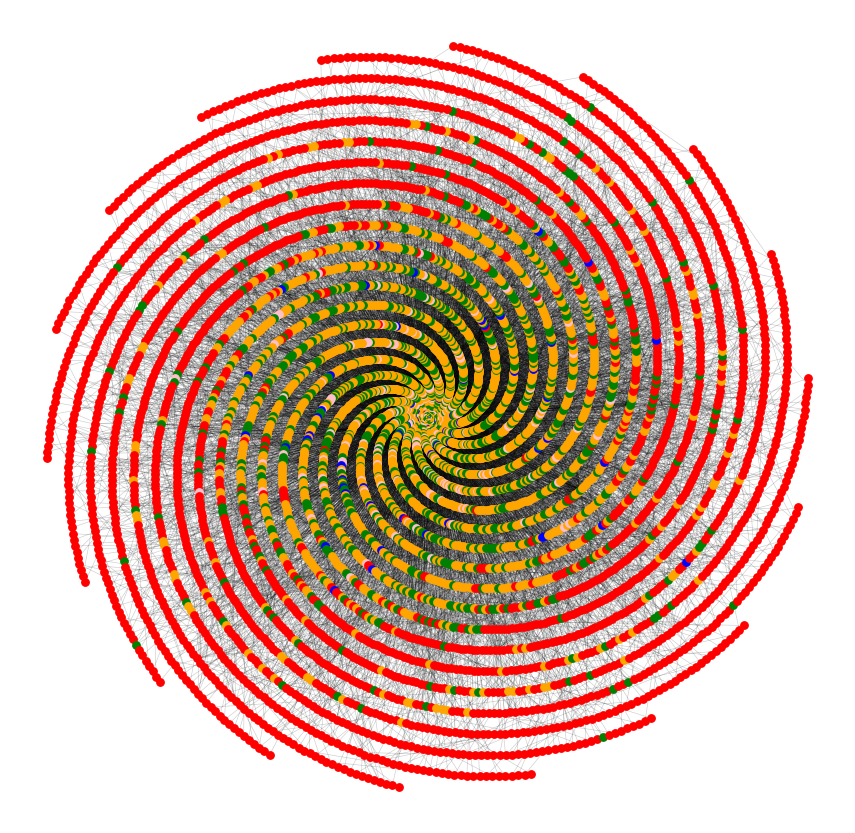

In [7]:
pos = nx.spiral_layout(G)
printGraph(G, pos, role_extractor.roles)

#Same vibes:
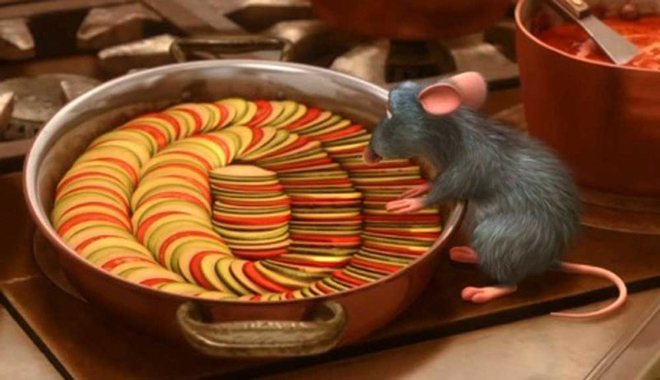

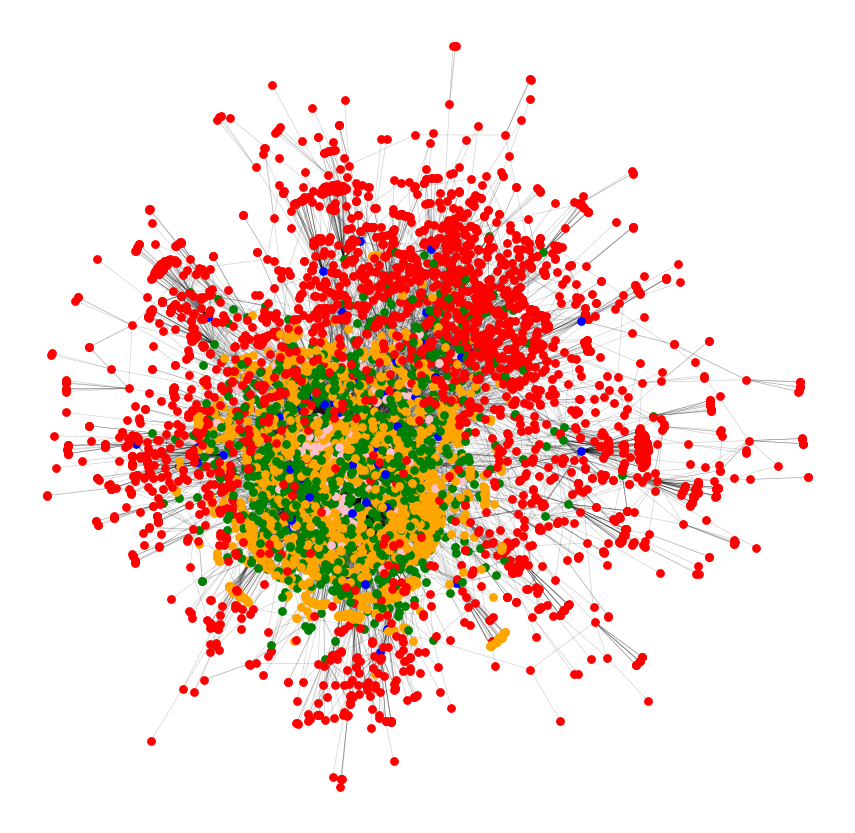

In [8]:
pos = nx.spring_layout(G)
printGraph(G, pos, role_extractor.roles)